In [294]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import StandardScaler


<a id="contents"></a>

## Notebook contents

- [**Loading the Data**](#intro)

- [**Infotable EDA**](#infotable)

- [**Coverpage EDA**](#coverpage)

- [**Summarypage EDA**](#summarypage)



<a id="intro"></a>

## Loading the Data

[Return to contents](#contents)


### Infotable Data

In [ ]:
%matplotlib inline

if os.path.exists("infotable_dataset.csv"):
    infotable_dataset = pd.read_csv("infotable_dataset.csv")
else:
    file_paths = [
        'INFOTABLE_2023q4.tsv'
    ]

    dataframes = []

    for file_path in file_paths:
        year_quarter = file_path.split('_')[1].split('.')[0]
        year = int(year_quarter[:4])
        quarter = int(year_quarter[4:].replace("q", ""))
        df = pd.read_csv(file_path, delimiter='\t')
        df.rename(columns={'investor': 'ACCESSION_NUMBER'}, inplace=True)

        if quarter == 1:
            df['timestamp'] = pd.Timestamp(year, 1, 1)  # Q1: January 1st
        elif quarter == 2:
            df['timestamp'] = pd.Timestamp(year, 4, 1)  # Q2: April 1st
        elif quarter == 3:
            df['timestamp'] = pd.Timestamp(year, 7, 1)  # Q3: July 1st
        elif quarter == 4:
            df['timestamp'] = pd.Timestamp(year, 10, 1)  # Q4: October 1st

        dataframes.append(df)

    infotable_dataset = pd.concat(dataframes, ignore_index=True)

    infotable_dataset.to_csv("infotable_dataset.csv", index=False)

In [149]:
print(f"Infotable has {len(infotable_dataset)} rows.")


Infotable has 3278515 rows.


### Coverpage Data

In [140]:
if os.path.exists("coverpage_dataset.csv"):
    coverpage_dataset = pd.read_csv("coverpage_dataset.csv")
else:
    file_paths = [
        'COVERPAGE_2023q4.tsv'
    ]

    dataframes = []

    for file_path in file_paths:
        year_quarter = file_path.split('_')[1].split('.')[0]
        year = int(year_quarter[:4])
        quarter = int(year_quarter[4:].replace("q", ""))
        df = pd.read_csv(file_path, delimiter='\t')

        if quarter == 1:
            df['timestamp'] = pd.Timestamp(year, 1, 1)  # Q1: January 1st
        elif quarter == 2:
            df['timestamp'] = pd.Timestamp(year, 4, 1)  # Q2: April 1st
        elif quarter == 3:
            df['timestamp'] = pd.Timestamp(year, 7, 1)  # Q3: July 1st
        elif quarter == 4:
            df['timestamp'] = pd.Timestamp(year, 10, 1)  # Q4: October 1st

        dataframes.append(df)

    coverpage_dataset = pd.concat(dataframes, ignore_index=True)

    coverpage_dataset.to_csv("coverpage_dataset.csv", index=False)

In [141]:
print(f"Coverpage has {len(coverpage_dataset)} rows.")


Coverpage has 10117 rows.


In [184]:
if os.path.exists("summarypage_dataset.csv"):
    summarypage_dataset = pd.read_csv("summarypage_dataset.csv")
else:
    file_paths = [
        'SUMMARYPAGE_2023q4.tsv'
    ]

    dataframes = []
    for file_path in file_paths:
        year_quarter = file_path.split('_')[1].split('.')[0]
        year = int(year_quarter[:4])
        quarter = int(year_quarter[4:].replace("q", ""))
        df = pd.read_csv(file_path, delimiter='\t')

        if quarter == 1:
            df['timestamp'] = pd.Timestamp(year, 1, 1)  # Q1: January 1st
        elif quarter == 2:
            df['timestamp'] = pd.Timestamp(year, 4, 1)  # Q2: April 1st
        elif quarter == 3:
            df['timestamp'] = pd.Timestamp(year, 7, 1)  # Q3: July 1st
        elif quarter == 4:
            df['timestamp'] = pd.Timestamp(year, 10, 1)  # Q4: October 1st

        dataframes.append(df)

    summarypage_dataset = pd.concat(dataframes, ignore_index=True)

    summarypage_dataset.to_csv("summarypage_dataset.csv", index=False)

In [222]:
print(f"Summarypage has {len(summarypage_dataset)} rows.")


Summarypage has 8244 rows.


<a id="infotable"></a>

## Infotable EDA

[Return to contents](#contents)

- [**Summary**](#summaryinfo)

- [**Missing Values**](#missingvalues)

- [**Heatmap**](#Heatmap)

- [**Value Column**](#value)

- [**Infotable Imbalance**](#imbalanceinfo)

- [**Frequency Analysis**](#frequency)

- [**Histograms of Numeric Columns**](#histograms)



<a id="summaryinfo"></a>

### Summary

In this summary section we look at basic information about the INFOTABLE dataset including its shape, data types, and descriptive statistics.

In [223]:
infotable_dataset.shape

(3278515, 16)

We see that the shape of the dataset for INFOTABLE contains 3278515 rows and 16 columns. We can further observe the data types for INFOTABLE:

In [224]:
print(infotable_dataset.dtypes)

ACCESSION_NUMBER        object
INFOTABLE_SK             int64
NAMEOFISSUER            object
TITLEOFCLASS            object
CUSIP                   object
FIGI                    object
VALUE                    int64
SSHPRNAMT                int64
SSHPRNAMTTYPE           object
PUTCALL                 object
INVESTMENTDISCRETION    object
OTHERMANAGER            object
VOTING_AUTH_SOLE         int64
VOTING_AUTH_SHARED       int64
VOTING_AUTH_NONE         int64
timestamp               object
dtype: object


Next, we look at the descriptive statistics for the numerical columns.

In [225]:
print(infotable_dataset.describe())

       INFOTABLE_SK         VALUE     SSHPRNAMT  VOTING_AUTH_SOLE  \
count  3.278515e+06  3.278515e+06  3.278515e+06      3.278515e+06   
mean   1.035340e+08  1.789295e+07  2.946283e+05      2.208318e+05   
std    9.464430e+05  6.866326e+08  2.682088e+07      2.671712e+07   
min    1.018926e+08  0.000000e+00  0.000000e+00      0.000000e+00   
25%    1.027144e+08  1.383600e+04  6.310000e+02      0.000000e+00   
50%    1.035340e+08  3.068430e+05  7.208000e+03      3.040000e+02   
75%    1.043537e+08  2.107060e+06  4.652700e+04      1.750000e+04   
max    1.051733e+08  5.453552e+11  4.197289e+10      4.197289e+10   

       VOTING_AUTH_SHARED  VOTING_AUTH_NONE  
count        3.278515e+06      3.278515e+06  
mean         2.144117e+04      6.022588e+04  
std          7.194901e+05      2.094831e+06  
min          0.000000e+00      0.000000e+00  
25%          0.000000e+00      0.000000e+00  
50%          0.000000e+00      0.000000e+00  
75%          0.000000e+00      1.558000e+03  
max       

We see that for the columns `VOTING_AUTH_SOLE`, `VOTING_AUTH_SHARED`, and `VOTING_AUTH_NONE` have many 0 values. These columns represent voting authority, which means that many entities do not hold

# TODO

Next, we look at the descriptive statistics for the categorical columns.

In [226]:
print(infotable_dataset.describe(include=['object']))


            ACCESSION_NUMBER NAMEOFISSUER TITLEOFCLASS      CUSIP  \
count                3278515      3277716      3277505    3278515   
unique                  8125       137383        17383      38668   
top     0001086364-24-008417   ISHARES TR          COM  037833100   
freq                   48161       115603      1580355       9531   

                FIGI SSHPRNAMTTYPE PUTCALL INVESTMENTDISCRETION OTHERMANAGER  \
count         260310       3278515  115797              3278515      1519535   
unique         16021             2       2                    3         3262   
top     BBG019PD35Z0            SH    Call                 SOLE            1   
freq            2288       3247099   59458              2003219       266785   

         timestamp  
count      3278515  
unique           1  
top     2023-10-01  
freq       3278515  


<a id="missingvalues"></a>

### Missing Values

In this section we look at the missing values in each column of INFOTABLE.

In [227]:
print(infotable_dataset.isna().sum())

ACCESSION_NUMBER              0
INFOTABLE_SK                  0
NAMEOFISSUER                799
TITLEOFCLASS               1010
CUSIP                         0
FIGI                    3018205
VALUE                         0
SSHPRNAMT                     0
SSHPRNAMTTYPE                 0
PUTCALL                 3162718
INVESTMENTDISCRETION          0
OTHERMANAGER            1758980
VOTING_AUTH_SOLE              0
VOTING_AUTH_SHARED            0
VOTING_AUTH_NONE              0
timestamp                     0
dtype: int64


The columns `NAMEOFISSUER`, `TITLEOFCLASS`, `FIGI`, `PUTCALL`, and `OTHERMANAGER` have missing values. However, this will not be an issue. Note that `NAMEOFISSUER`, `TITLEOFCLASS`, and `FIGI` can be used to identifier the specific security, but this is unnecessary because the securities can be uniquely identified using the `CUSIP`. 

The `PUTCALL` column has many missing values, but these are easily filled in. If the value is missing, we can assume that the security is neither a put nor a call, but instead owned outright.

`OTHERMANAGER` has missing values, but this is not an issue. This column is only used when the investment discretion is shared with another manager. If the value is missing, then the investment discretion is not shared. 

In [228]:
infotable_dataset['PUTCALL'] = infotable_dataset['PUTCALL'].fillna('N/A')
infotable_dataset['OTHERMANAGER'] = infotable_dataset['OTHERMANAGER'].fillna('N/A')

<a id="heatmap"></a>

### Heatmap of INFOTABLE numeric variables

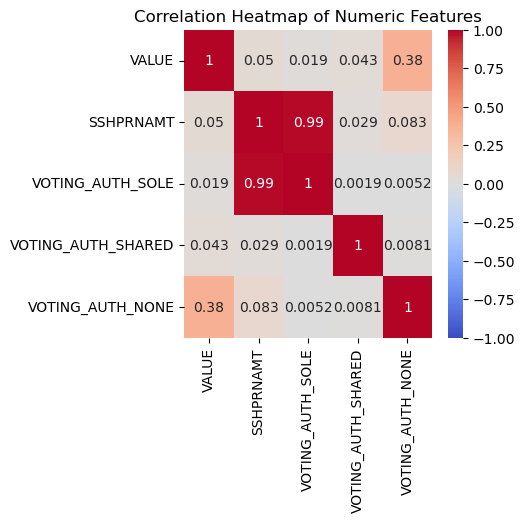

In [229]:
numeric_features = ['VALUE', 'SSHPRNAMT', 'VOTING_AUTH_SOLE', 'VOTING_AUTH_SHARED', 'VOTING_AUTH_NONE']

plt.figure(figsize=(4, 4))
sns.heatmap(infotable_dataset[numeric_features].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

By looking at this heatmap, we can see an obvious high positive correlation between the variables SSHPRNAMT and VOTING_AUTH_SOLE. This could cause multicollinearity in model building depending on the structure of the model, so we will take this into account during model building as there is obvious correlation between these variables.

The rest of the variables are not too highly correlated with each other.

<a id="value"></a>

### Value Column

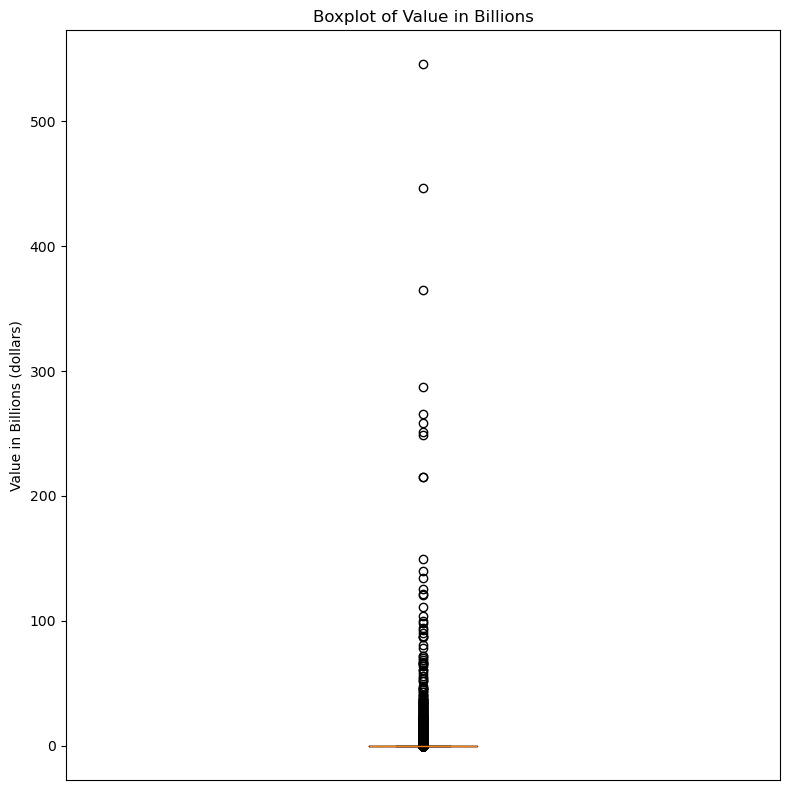

In [230]:
fig, ax = plt.subplots(figsize=(8, 8))

plt.boxplot(infotable_dataset['VALUE']/1000000000)

plt.title('Boxplot of Value in Billions')
plt.ylabel('Value in Billions (dollars)')
plt.xticks([])

plt.tight_layout()
plt.show()

We can see in the boxplot that the distribution of value is heavily skewed with some extremely high values towards over 200 billion dollars.

Observing the statistics from the summary section, we first see that the distribution of value is pretty wide, as the standard deviation is 686 million and mean of about 1.7 billion dollars. For the `VALUE` column, we noted that there are many observations with 0's indicating 0 market value. It seems like these observations could provide some context as to the market value of certain stocks for companies and help identify trends for buying and selling behaviors.

We also note that there are several outliers for market value. Some observations have market values over 100 billion, major outliers compared to some of the rest of the companies. These are highly successful companies, such as Microsoft, Nvidia, Amazon, and Apple. We will use standardization to scale this variable to mitigate the influence of these larger companies and see how they compare with the rest of our data. This standardization process involves subtracting by the mean and dividing by the standard deviation, putting this variable on the same scale. We may also consider using a log scale when using this variable.



### Scatterplots

First, we observe a scatterplot for the scaled variables value and sole voting authority.

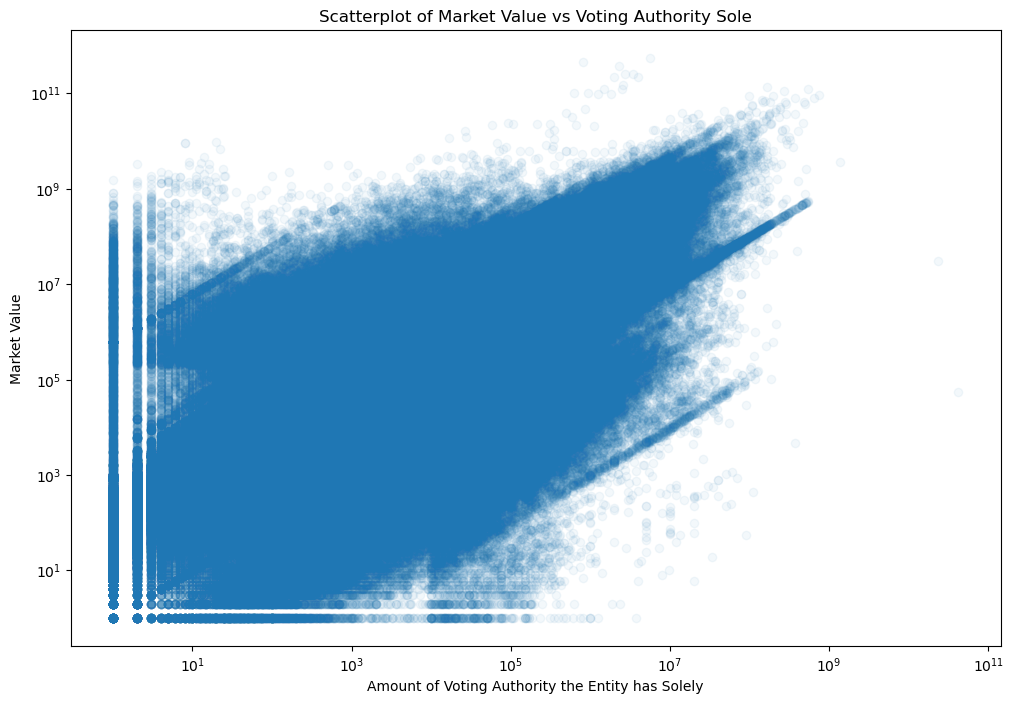

In [309]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(infotable_dataset['VOTING_AUTH_SOLE'], infotable_dataset['VALUE'], alpha = 0.05)
ax.set_title("Scatterplot of Market Value vs Voting Authority Sole")
ax.set_xlabel("Amount of Voting Authority the Entity has Solely")
ax.set_ylabel("Market Value")
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

We can see in the scatterplot there is no clear linear relationship between these variables. It seems that there is a large assortment of points jumbled in the middle of the plot with no clear relationship.

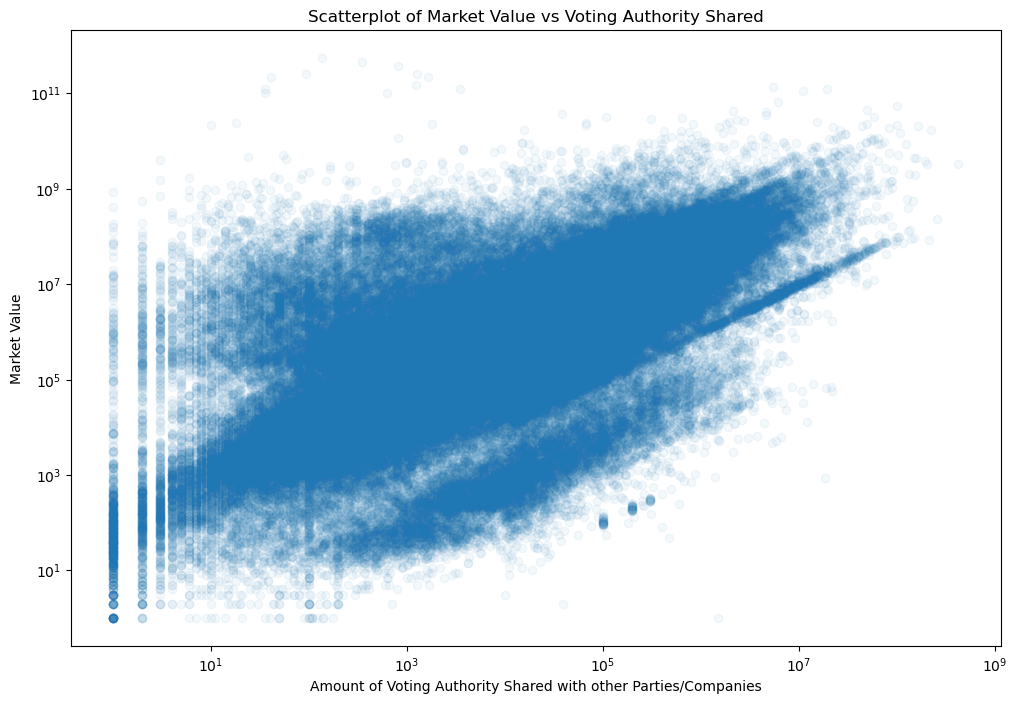

In [311]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(infotable_dataset['VOTING_AUTH_SHARED'], infotable_dataset['VALUE'], alpha = 0.05)
ax.set_title("Scatterplot of Market Value vs Voting Authority Shared")
ax.set_xlabel("Amount of Voting Authority Shared with other Parties/Companies")
ax.set_ylabel("Market Value")
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

Looking at this scatterplot, there appears to be a more clear linear relationship between the variables. It seems like as the number of shares of a stock which is shared between multiple parties increases, the market value of the stock also increases.

<a id="imbalanceinfo"></a>

### Infotable Imbalance

Here, we observe a bar plot of 3 key variables in INFOTABLE to observe any imbalance. We use a log scale to easily read the axis.

ea


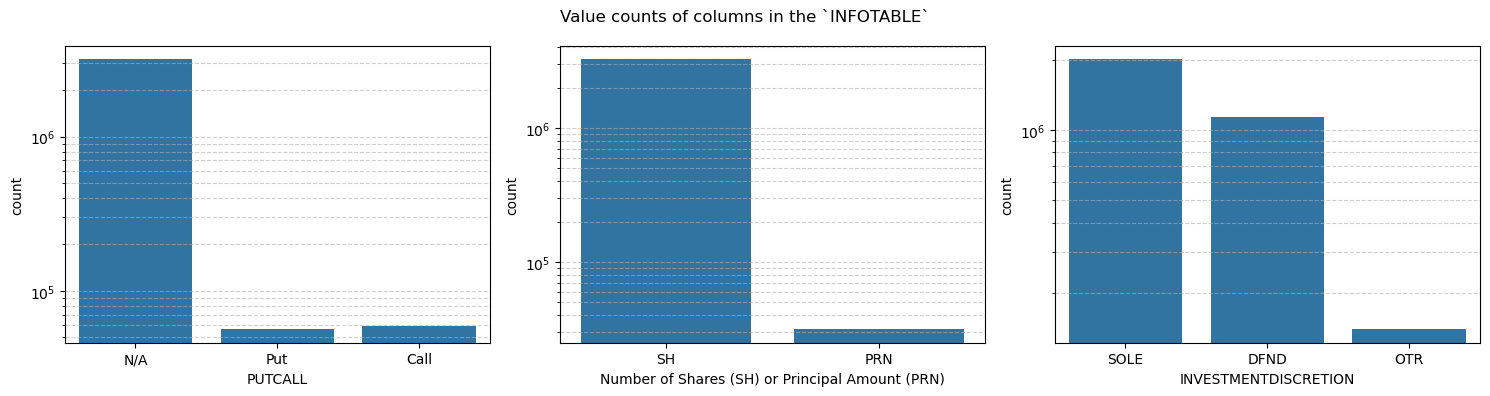

In [324]:
info_imbalance = ['PUTCALL', 'SSHPRNAMTTYPE', 'INVESTMENTDISCRETION']

fig, ax = plt.subplots(1, 3,figsize=(15, 4))

for i, var in enumerate(info_imbalance):
    sns.countplot(data=infotable_dataset, x=var, ax=ax[i])
    ax[i].set_yscale('log')
    ax[i].grid(axis='y', linestyle='--', alpha=0.6, which='both')
    if var == 'SSHPRNAMTTYPE':
        ax[i].set_xlabel('Number of Shares (SH) or Principal Amount (PRN)')
    elif var == 'INVESTMENTDISCRETION':
        ax[i].set_xlabel('Investment discretion.')

plt.suptitle('Value counts of columns in the `INFOTABLE`')
plt.tight_layout()
plt.show()

As we can see in the bar plots, is major data imbalance within some of the categorical variables in our dataset, some classes have far fewer samples than others. Noteworthy is that most Put/Calls are neither a put nor a call. also 

 We plan to use stratified cross-validation to help ensure each fold of the training data will have the same distribution of classes as the entire dataset. This will mitigate this issue rather than utilizing another method such as oversampling, as using stratified cross-validation will fix the imbalance issue in these important classes.


<a id="frequency"></a>

### Frequency Analysis, Data Imbalance

In this section, we observe the frequency of different values across the INFOTABLE dataset, plotting the value counts of these columns to show data imbalance of the variables which take on many different categories (thousands).

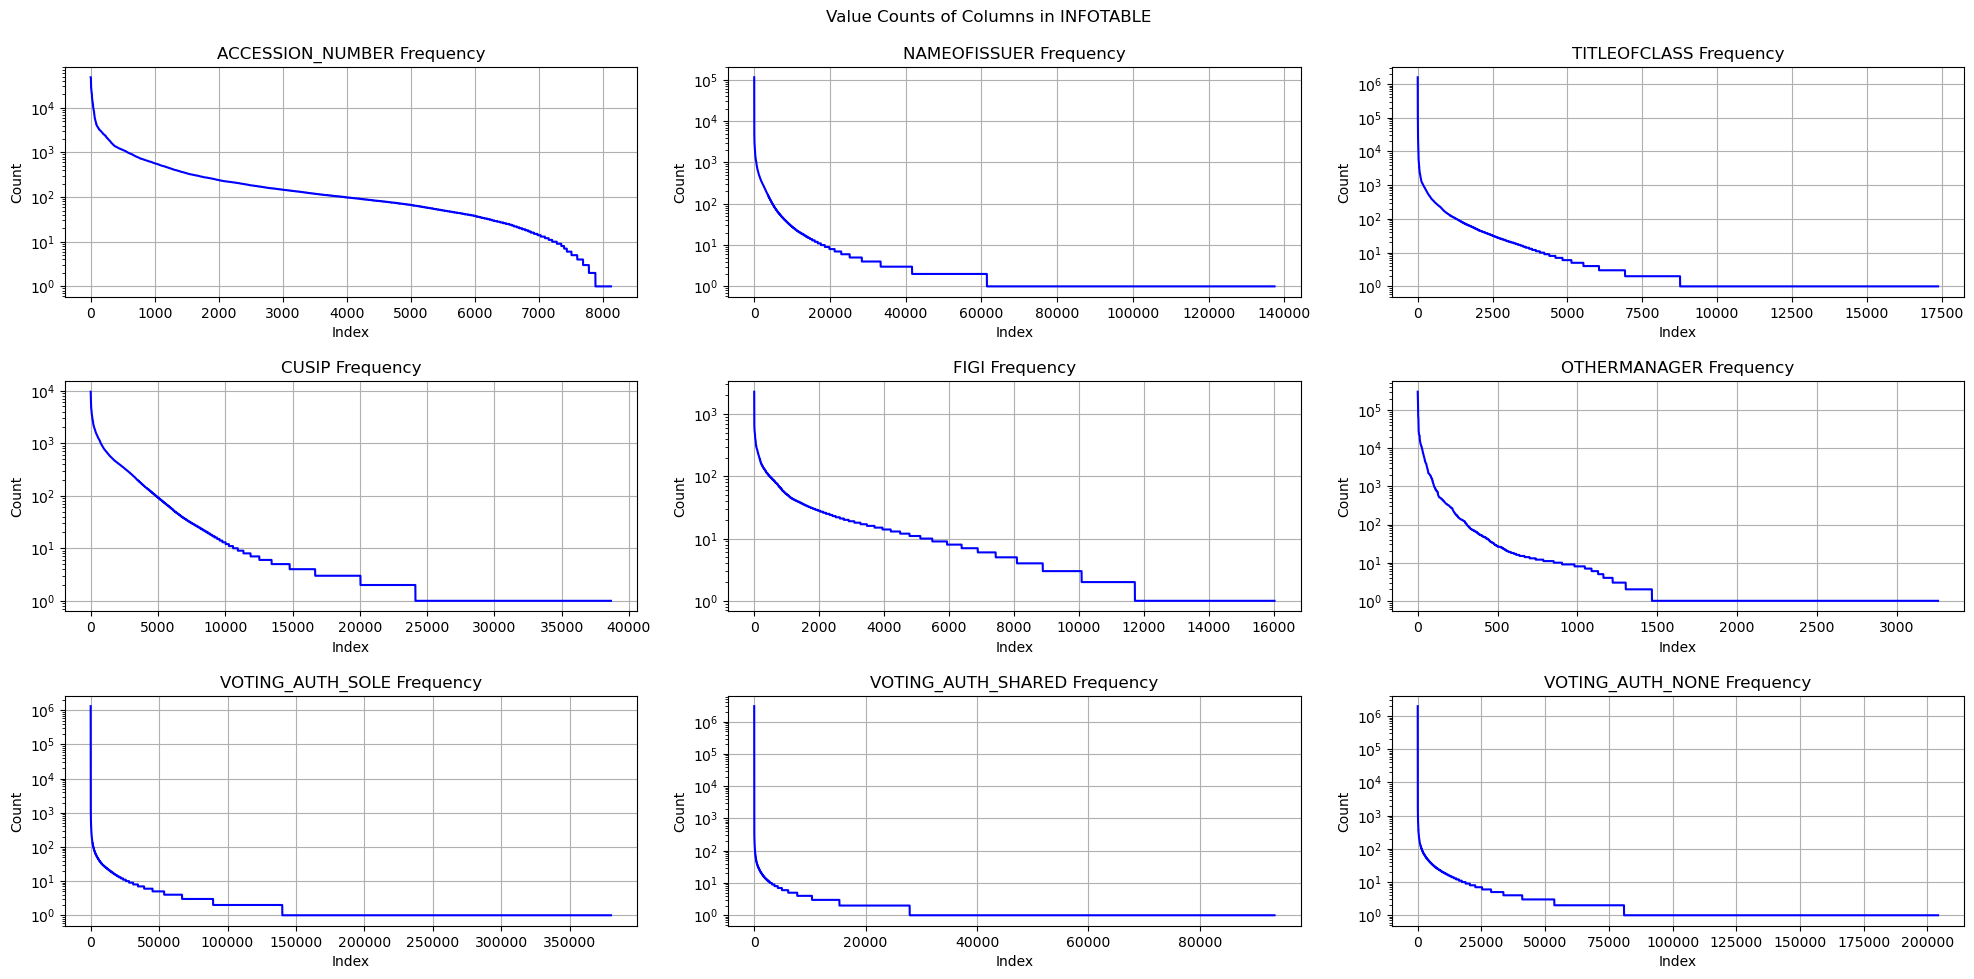

In [81]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))

ax[0,0].plot(infotable_dataset['ACCESSION_NUMBER'].value_counts().values, color='blue')
ax[0,0].set_yscale('log')
ax[0,0].set_title("ACCESSION_NUMBER Frequency")
ax[0,0].set_xlabel("Index")
ax[0,0].set_ylabel("Count")
ax[0,0].grid(True)

ax[0,1].plot(infotable_dataset['NAMEOFISSUER'].value_counts().values, color='blue')
ax[0,1].set_yscale('log')
ax[0,1].set_title("NAMEOFISSUER Frequency")
ax[0,1].set_xlabel("Index")
ax[0,1].set_ylabel("Count")
ax[0,1].grid(True)

ax[0,2].plot(infotable_dataset['TITLEOFCLASS'].value_counts().values, color='blue')
ax[0,2].set_yscale('log')
ax[0,2].set_title("TITLEOFCLASS Frequency")
ax[0,2].set_xlabel("Index")
ax[0,2].grid(True)
ax[0,2].set_ylabel("Count")

ax[1,0].plot(infotable_dataset['CUSIP'].value_counts().values, color='blue')
ax[1,0].set_yscale('log')
ax[1,0].set_title("CUSIP Frequency")
ax[1,0].set_xlabel("Index")
ax[1,0].set_ylabel("Count")
ax[1,0].grid(True)

ax[1,1].plot(infotable_dataset['FIGI'].value_counts().values, color='blue')
ax[1,1].set_yscale('log')
ax[1,1].set_title("FIGI Frequency")
ax[1,1].set_xlabel("Index")
ax[1,1].set_ylabel("Count")
ax[1,1].grid(True)

ax[1,2].plot(infotable_dataset['OTHERMANAGER'].value_counts().values, color='blue')
ax[1,2].set_yscale('log')
ax[1,2].set_title("OTHERMANAGER Frequency")
ax[1,2].set_xlabel("Index")
ax[1,2].set_ylabel("Count")
ax[1,2].grid(True)

ax[2,0].plot(infotable_dataset['VOTING_AUTH_SOLE'].value_counts().values, color='blue')
ax[2,0].set_yscale('log')
ax[2,0].set_title("VOTING_AUTH_SOLE Frequency")
ax[2,0].set_xlabel("Index")
ax[2,0].set_ylabel("Count")
ax[2,0].grid(True)

ax[2,1].plot(infotable_dataset['VOTING_AUTH_SHARED'].value_counts().values, color='blue')
ax[2,1].set_yscale('log')
ax[2,1].set_title("VOTING_AUTH_SHARED Frequency")
ax[2,1].set_xlabel("Index")
ax[2,1].set_ylabel("Count")
ax[2,1].grid(True)

ax[2,2].plot(infotable_dataset['VOTING_AUTH_NONE'].value_counts().values, color='blue')
ax[2,2].set_yscale('log')
ax[2,2].set_title("VOTING_AUTH_NONE Frequency")
ax[2,2].set_xlabel("Index")
ax[2,2].set_ylabel("Count")
ax[2,2].grid(True)

plt.suptitle("Value Counts of Columns in INFOTABLE")
plt.tight_layout(pad=1.5)
plt.show()

# TODO DESCRIPTION

<a id="histograms"></a>


### Histograms of Numeric Columns

We now create histograms of the numeric features in our dataset.

# Maybe we could make them more clear?

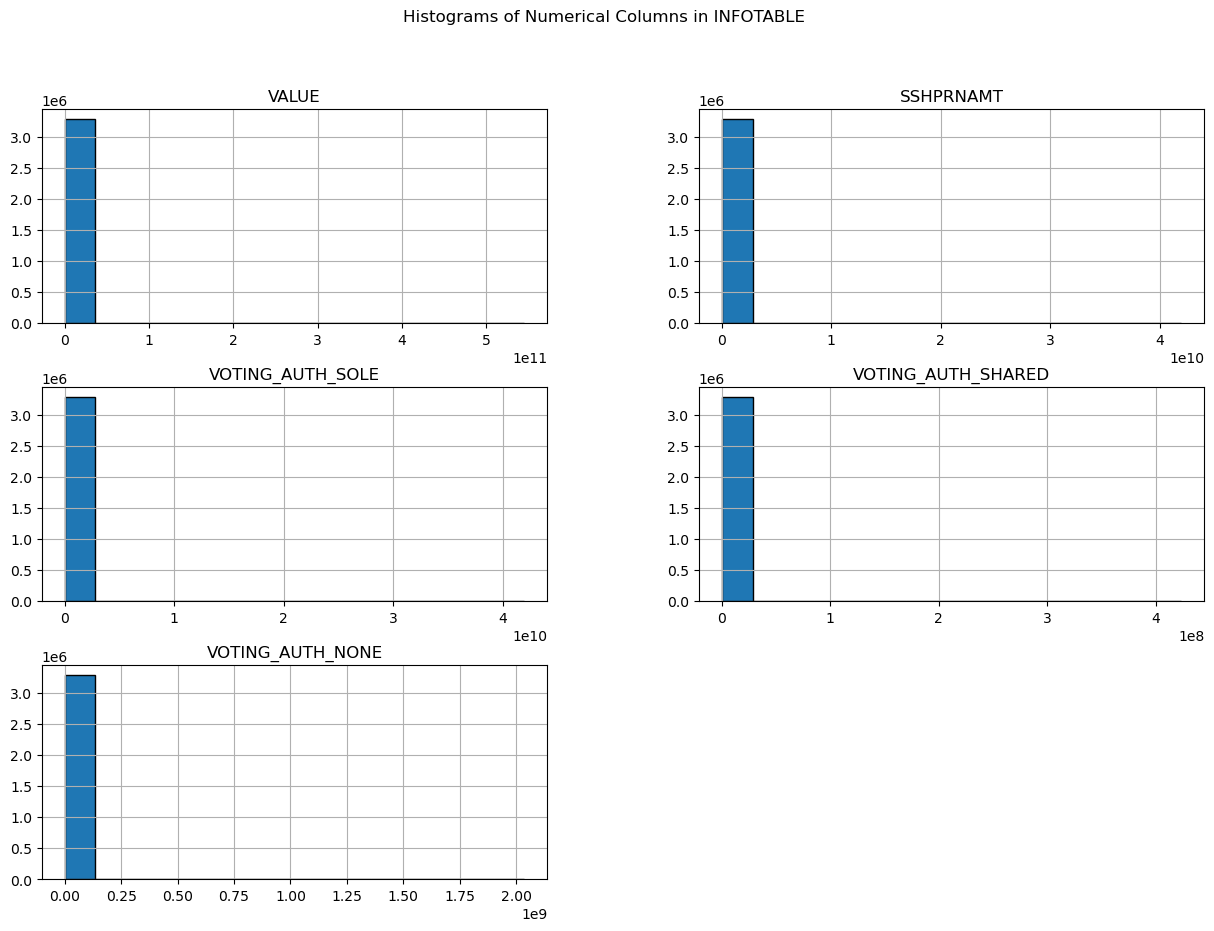

In [121]:
infotable_dataset[numeric_features].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle(f"Histograms of Numerical Columns in INFOTABLE")
plt.show()

We can see in the histograms the distributions are heavily skewed. Standardizing in this case will be essential before conducting analysis. We utilize the standard scalar to scale these numeric variables.

<a id="coverpage"></a>

## Coverpage EDA

[Return to contents](#contents)

- [**Summary**](#summarycover)

- [**Missing Values**](#missingvaluescover)

- [**Data Imbalance**](#imbalancecover)

<a id="summarycover"></a>

### Summary

This section presents the basic summary of the COVERPAGE dataset, such as the data types, shape, and descriptive statistics of the columns.

In [161]:
print("Shape for Coverpage dataframe:")
print(coverpage_dataset.shape)

Data types of the columns for Coverpage:
(10117, 22)


We see that the COVERPAGE dataframe has 22 columns and 10117 rows. We observe the exact types and names of each column:

In [160]:
print("Data types of the columns for Coverpage:")
print(coverpage_dataset.dtypes)

Data types of the columns for Coverpage:
ACCESSION_NUMBER                 object
REPORTCALENDARORQUARTER          object
ISAMENDMENT                      object
AMENDMENTNO                     float64
AMENDMENTTYPE                    object
CONFDENIEDEXPIRED                object
DATEDENIEDEXPIRED                object
DATEREPORTED                     object
REASONFORNONCONFIDENTIALITY      object
FILINGMANAGER_NAME               object
FILINGMANAGER_STREET1            object
FILINGMANAGER_STREET2            object
FILINGMANAGER_CITY               object
FILINGMANAGER_STATEORCOUNTRY     object
FILINGMANAGER_ZIPCODE            object
REPORTTYPE                       object
FORM13FFILENUMBER                object
CRDNUMBER                       float64
SECFILENUMBER                    object
PROVIDEINFOFORINSTRUCTION5       object
ADDITIONALINFORMATION            object
timestamp                        object
dtype: object


Next, the descriptive statistics of the numeric columns:

In [134]:
print("Descriptive statistics for numerical columns:")
print(coverpage_dataset.describe())

Descriptive statistics for numerical columns:
       AMENDMENTNO     CRDNUMBER
count   406.000000  4.408000e+03
mean      1.238916  4.272362e+05
std       1.665796  1.393088e+07
min       1.000000  0.000000e+00
25%       1.000000  1.193845e+05
50%       1.000000  1.574280e+05
75%       1.000000  2.878568e+05
max      27.000000  9.215079e+08


We see there are only 2 numeric features in this dataset. However, AMENTMENTNO is simply just the amendment number, so it is essentially a categorical variable. Also, CRDNUMBER could also be interpreted as a categorical variable, so all the variables are categorical.

Next, the categorical columns:

In [162]:
print("Descriptive statistics for categorical columns:")
print(coverpage_dataset.describe(include=['object']))

Descriptive statistics for categorical columns:
            ACCESSION_NUMBER REPORTCALENDARORQUARTER ISAMENDMENT  \
count                  10117                   10117        5415   
unique                 10117                      42           2   
top     0002035951-24-000001             30-JUN-2024           N   
freq                       1                    9100        5009   

       AMENDMENTTYPE CONFDENIEDEXPIRED DATEDENIEDEXPIRED DATEREPORTED  \
count            406               116                16           16   
unique             2                 2                 6            9   
top      RESTATEMENT                 N       14-AUG-2024  15-MAY-2024   
freq             233               100                 8            5   

           REASONFORNONCONFIDENTIALITY        FILINGMANAGER_NAME  \
count                               16                     10117   
unique                               1                      9018   
top     Confidential Treatment Expired  G

<a id="missingvaluescover"></a>


### Missing values

In [178]:
coverpage_dataset['REPORTTYPE'].unique()

array(['13F HOLDINGS REPORT', '13F NOTICE', '13F COMBINATION REPORT'],
      dtype=object)

In [165]:
print("Number of missing values in each column of the infotable:")
print(coverpage_dataset.isna().sum())

Number of missing values in each column of the infotable:
ACCESSION_NUMBER                    0
REPORTCALENDARORQUARTER             0
ISAMENDMENT                      4702
AMENDMENTNO                      9711
AMENDMENTTYPE                    9711
CONFDENIEDEXPIRED               10001
DATEDENIEDEXPIRED               10101
DATEREPORTED                    10101
REASONFORNONCONFIDENTIALITY     10101
FILINGMANAGER_NAME                  0
FILINGMANAGER_STREET1               3
FILINGMANAGER_STREET2            4471
FILINGMANAGER_CITY                 11
FILINGMANAGER_STATEORCOUNTRY        3
FILINGMANAGER_ZIPCODE              21
REPORTTYPE                          0
FORM13FFILENUMBER                   0
CRDNUMBER                        5709
SECFILENUMBER                    5959
PROVIDEINFOFORINSTRUCTION5          0
ADDITIONALINFORMATION            9704
timestamp                           0
dtype: int64


Clearly, a large number of columns in the `COVERPAGE` table have missing values. This is not surprising, as not all columns are required to be filled out by the filer. For example, the `AMENDMENTNO` column is only filled out if the `ISAMENDMENT` column is checked. In our data analysis, the only columns that we may use are `ACCESSION_NUMBER`, `REPORTCALENDARORQUARTER`, and `ISAMENDMENT`. Therefore, we can replace missing values in `ISAMENDMENT` with `N` and missing values in `AMENDMENTNO` with `0`.

In [170]:
coverpage_dataset['AMENDMENTNO'] = coverpage_dataset['AMENDMENTNO'].fillna(0)
coverpage_dataset['AMENDMENTTYPE'] = coverpage_dataset['AMENDMENTTYPE'].fillna('NEW HOLDINGS')

<a id="imbalancecover"></a>


### Data Imbalances

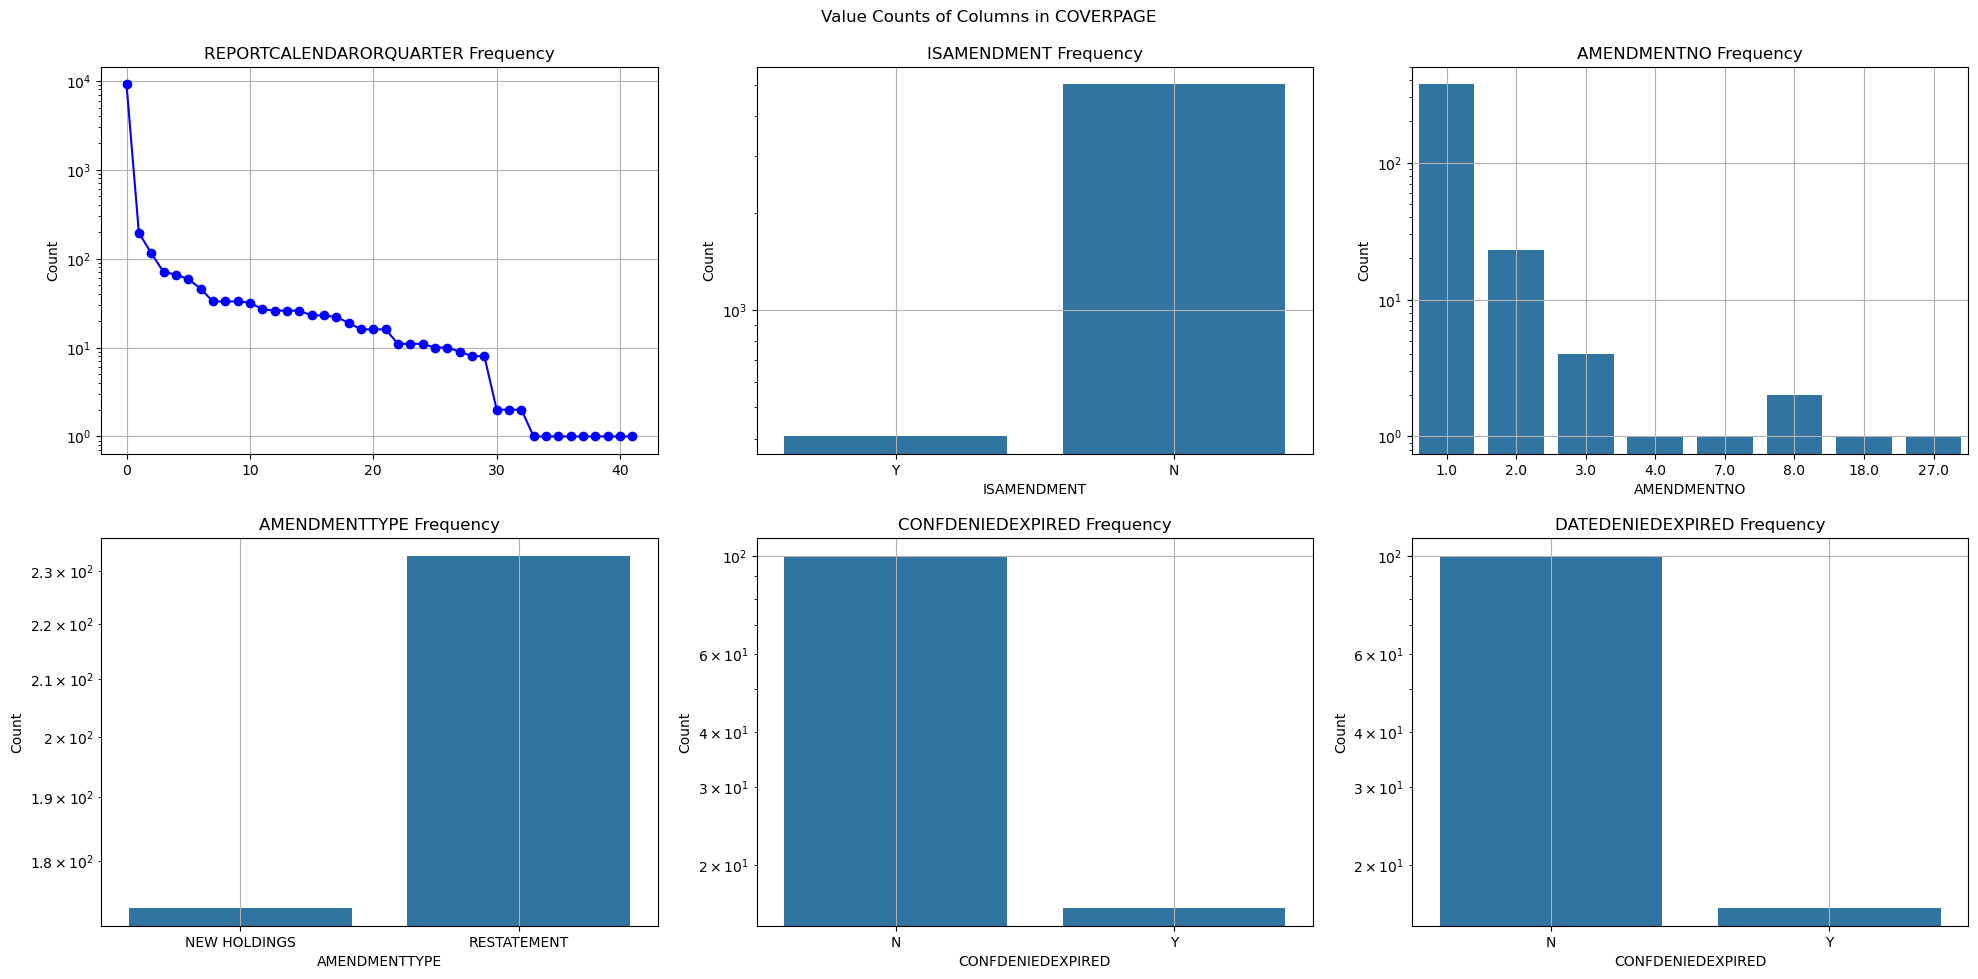

In [164]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))

ax[0,0].plot(coverpage_dataset['REPORTCALENDARORQUARTER'].value_counts().values, 
             color='blue', linestyle='-', marker='o')
ax[0,0].set_yscale('log')
ax[0,0].set_title("REPORTCALENDARORQUARTER Frequency")
ax[0,0].set_ylabel("Count")
ax[0,0].grid(True)

sns.countplot(data=coverpage_dataset, x='ISAMENDMENT', ax=ax[0,1])
ax[0,1].set_yscale('log')
ax[0,1].set_title("ISAMENDMENT Frequency")
ax[0,1].set_ylabel("Count")
ax[0,1].grid(True)

sns.countplot(data=coverpage_dataset, x='AMENDMENTNO', ax=ax[0,2])
ax[0,2].set_yscale('log')
ax[0,2].set_title("AMENDMENTNO Frequency")
ax[0,2].grid(True)
ax[0,2].set_ylabel("Count")

sns.countplot(data=coverpage_dataset, x='AMENDMENTTYPE', ax=ax[1,0])
ax[1,0].set_yscale('log')
ax[1,0].set_title("AMENDMENTTYPE Frequency")
ax[1,0].set_ylabel("Count")
ax[1,0].grid(True)

sns.countplot(data=coverpage_dataset, x='CONFDENIEDEXPIRED', ax=ax[1,1])
ax[1,1].set_yscale('log')
ax[1,1].set_title("CONFDENIEDEXPIRED Frequency")
ax[1,1].set_ylabel("Count")
ax[1,1].grid(True)

sns.countplot(data=coverpage_dataset, x='CONFDENIEDEXPIRED', ax=ax[1,2])
ax[1,2].set_yscale('log')
ax[1,2].set_title("DATEDENIEDEXPIRED Frequency")
ax[1,2].set_ylabel("Count")
ax[1,2].grid(True)

plt.suptitle("Value Counts of Columns in COVERPAGE")
plt.tight_layout(pad=1.5)
plt.show()

We can observe the data imbalance in our data within these plots. It seems there is high data imbalance for every single categorical variable, however as we stated for INFOTABLE, for these variables we will use stratified cross-validation if they are utilized in our model.

<a id="summarypage"></a>

## Summarypage EDA

[Return to contents](#contents)

- [**Summary**](#summarysummary)

- [**Missing Values**](#missingvaluessummary)

- [**Data Imbalance**](#imbalancesummary)

<a id="summarysummary"></a>

### Summary

In [192]:
print("Shape for Summarypage dataframe:")
print(summarypage_dataset.shape)

Shape for Summarypage dataframe:
(8244, 6)


The shape of the SUMMARYPAGE dataframe is 8244 rows and 6 columns.

In [193]:
print("Data types of the columns for Summarypage:")
print(summarypage_dataset.dtypes)

Data types of the columns for Summarypage:
ACCESSION_NUMBER                      object
OTHERINCLUDEDMANAGERSCOUNT             int64
TABLEENTRYTOTAL                        int64
TABLEVALUETOTAL                        int64
ISCONFIDENTIALOMITTED                 object
timestamp                     datetime64[us]
dtype: object


In [194]:
print("Descriptive statistics for numerical columns:")
print(summarypage_dataset.describe())

Descriptive statistics for numerical columns:
       OTHERINCLUDEDMANAGERSCOUNT  TABLEENTRYTOTAL  TABLEVALUETOTAL  \
count                 8244.000000      8244.000000     8.244000e+03   
mean                     0.426371       792.687773     7.108208e+09   
min                      0.000000         0.000000     0.000000e+00   
25%                      0.000000        33.000000     1.368915e+08   
50%                      0.000000        94.000000     3.001886e+08   
75%                      0.000000       230.250000     9.427800e+08   
max                     69.000000    992103.000000     5.205558e+12   
std                      2.111025     16643.253831     9.897344e+10   

                 timestamp  
count                 8244  
mean   2023-10-01 00:00:00  
min    2023-10-01 00:00:00  
25%    2023-10-01 00:00:00  
50%    2023-10-01 00:00:00  
75%    2023-10-01 00:00:00  
max    2023-10-01 00:00:00  
std                    NaN  


In [195]:
print("Descriptive statistics for categorical columns:")
print(summarypage_dataset.describe(include=['object']))

Descriptive statistics for categorical columns:
            ACCESSION_NUMBER ISCONFIDENTIALOMITTED
count                   8244                  5501
unique                  8244                     2
top     0002035951-24-000001                     N
freq                       1                  5387


<a id="missingvaluessummary"></a>


### Missing Values

In [211]:
print("Number of missing values in each column of the summary page:")
print(summarypage_dataset.isna().sum())

Number of missing values in each column of the summary page:
ACCESSION_NUMBER                 0
OTHERINCLUDEDMANAGERSCOUNT       0
TABLEENTRYTOTAL                  0
TABLEVALUETOTAL                  0
ISCONFIDENTIALOMITTED         2743
timestamp                        0
dtype: int64


The only column with missing values is `ISCONFIDENTIALOMITTED`. This column is a boolean column that indicates whether the data is confidential. If the value is missing, we can assume that the data is not confidential.

In [213]:
summarypage_dataset['ISCONFIDENTIALOMITTED'] = summarypage_dataset['ISCONFIDENTIALOMITTED'].fillna('N/A')

<a id="imbalancesummary"></a>


### Data Imbalance



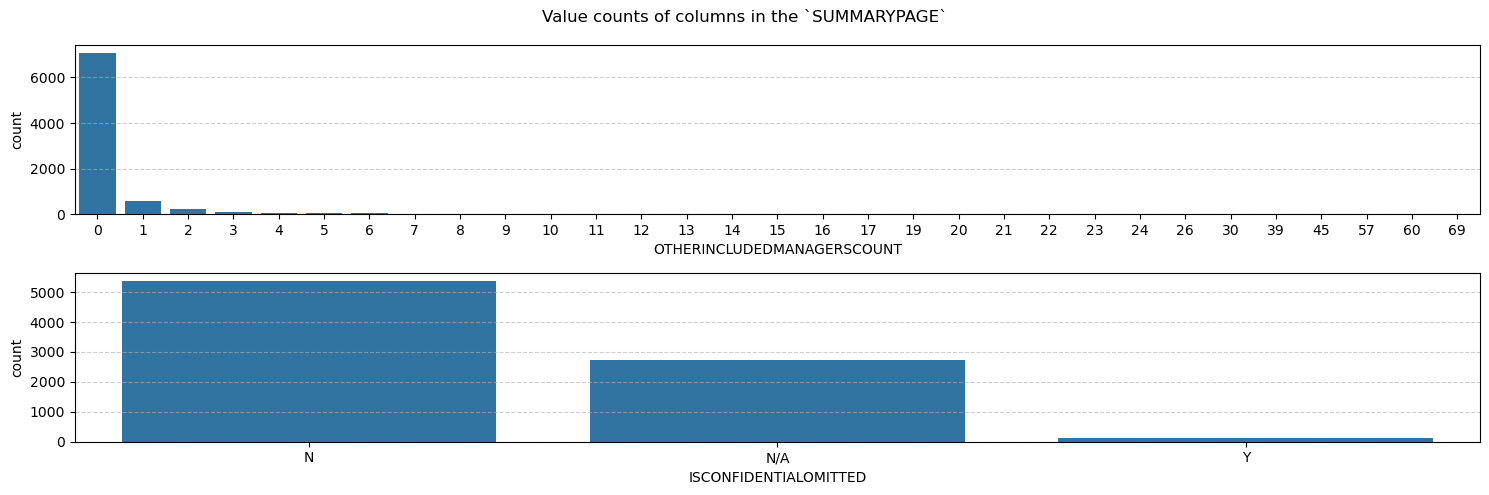

In [215]:
fig, ax = plt.subplots(2,1,figsize=(15, 5))

sns.countplot(data=summarypage_dataset, x='OTHERINCLUDEDMANAGERSCOUNT', ax=ax[0])
ax[0].grid(axis='y', linestyle='--', alpha=0.6, which='major')
#
sns.countplot(data=summarypage_dataset, x='ISCONFIDENTIALOMITTED', ax=ax[1])
ax[1].grid(axis='y', linestyle='--', alpha=0.6, which='both')

plt.suptitle('Value counts of columns in the `SUMMARYPAGE`')
plt.tight_layout()
plt.show()

# Full dataset?

In [ ]:
merged_dataset_1 = pd.merge(infotable_dataset, summarypage_dataset, on='ACCESSION_NUMBER', how='inner')

final_merged_dataset = pd.merge(merged_dataset_1, coverpage_dataset, on='ACCESSION_NUMBER', how='inner')


In [317]:
final_merged_dataset.isna().sum()

ACCESSION_NUMBER                      0
INFOTABLE_SK                          0
NAMEOFISSUER                        799
TITLEOFCLASS                       1010
CUSIP                                 0
FIGI                            3018205
VALUE                                 0
SSHPRNAMT                             0
SSHPRNAMTTYPE                         0
PUTCALL                               0
INVESTMENTDISCRETION                  0
OTHERMANAGER                          0
VOTING_AUTH_SOLE                      0
VOTING_AUTH_SHARED                    0
VOTING_AUTH_NONE                      0
timestamp_x                           0
OTHERINCLUDEDMANAGERSCOUNT            0
TABLEENTRYTOTAL                       0
TABLEVALUETOTAL                       0
ISCONFIDENTIALOMITTED                 0
timestamp_y                           0
REPORTCALENDARORQUARTER               0
ISAMENDMENT                     1938106
AMENDMENTNO                           0
AMENDMENTTYPE                         0
